# Refresh Statistic

Angewandte Statistik - David Meintrup - zu wiederholen

1) **1.1 bis 1.2 Einleitung daten & skalen**
- Stetig vs diskrete (done)

2) **1.3 - 1.5 Grapische Darstellung, Heatmaps & karten**
- Streudiagramm

3) **2.1 - 2.5 Deskriptive Statistik**
- Lagenmasße
- Streumaße
- Boxplot

4) **2.6: Kovarianz & Korrelation ; 4. Konkrete Verteilungen ; 5.5 QUantile Diagramm und Normalität**
- Normalverteilung
- Korrelation
- Quantile

5) **6: Testen statistischer Hypothese**
- H0 / H1
- Alpha / Beta Fehler
- Konfusionsmatrix

6) **7.1-7.3: Hypothesentest für eine Stichproben**

7) **8.1 - 8.4: Hypothesentest für zwei Stichproben**

8) **10.1-10.3: Hypothesentest für mehr als zwei Stitchproben**
- Post-hoc
- ANNOVA

9) **11.1-11.4: Einfaktorielle Modell**
- X^2 Test
- Lineare Regression
- Least Square
- Logistische Regression










## Statistik Wiederholung

In [ ]:
path = r"/content/diamonds.csv"
df_read = pd.read_csv(path)
real_df = deepcopy(df_read)

col_name = real_df.columns[0]
real_df = real_df.rename(columns={col_name:"index"})
real_df.drop("index", axis=1)
real_df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '/content/diamonds.csv'

In [ ]:
num_df = real_df.select_dtypes(include=np.number) #.columns.to_list()
num_df.drop("index", axis=1)
num_df.head(3)

NameError: name 'real_df' is not defined

In [ ]:
cat_df = real_df.select_dtypes(exclude=np.number)
cat_df

In [ ]:
for col in num_df.columns[1:]:
  real_df[col].plot(kind="hist", density=False, bins=50, title=f"plot of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("probability")
  plt.show()

In [ ]:
clar = cat_df.columns[2]

NameError: name 'cat_df' is not defined

In [ ]:
real_df.boxplot(column="price", by=clar)

In [ ]:
for col in num_df.columns[1:]:
  real_df[col].plot(kind="kde", title=f"plot of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("probability")
  plt.show()

In [ ]:
carat_table = pd.crosstab(index=real_df["clarity"], columns="count", dropna=True)
carat_table

In [ ]:
carat_table.plot(kind="bar", title="Counts of carat by its clarity")
#plt.legend()

In [ ]:
caraty_table = pd.crosstab(index=real_df["clarity"], columns=real_df["color"])
caraty_table

In [ ]:
caraty_table.plot(kind="bar", stacked=False, figsize=(8,6))

In [ ]:
num_df.plot(kind="scatter", x="carat", y="price", alpha=0.7)

In [ ]:
for cols in cat_df.columns:
  sns.scatterplot(x="carat", y="price", alpha=0.7, hue=cols, data=real_df)
  plt.show()

In [ ]:
num_df.head(3)

In [ ]:
corelation_num = num_df.corr()
corr_price = corelation_num["price"].sort_values(ascending=False)
corr_price = round(corr_price,2)

ax = corr_price[1:].plot(kind="bar", stacked=False)

# Annotate the height of each bar
for container in ax.containers:
    ax.bar_label(container)
    ax.set_ylim(-1,1)

# Actual class

Dependencies & Common Functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from copy import deepcopy
#from ISLP import load_data
import sklearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from sklearn.model_selection import train_test_split

def split_input_output(data, output_cols):
  input = data.drop(columns=output_cols)
  output = data[output_cols]

  print(f"Input data has: {input.shape} shape")
  print(f"Output data has: {output.shape} shape")
  return input, output

List of datasets:

full dataset list can be found here: https://github.com/qx0731/Sharing_ISL_python?tab=readme-ov-file#isl_python


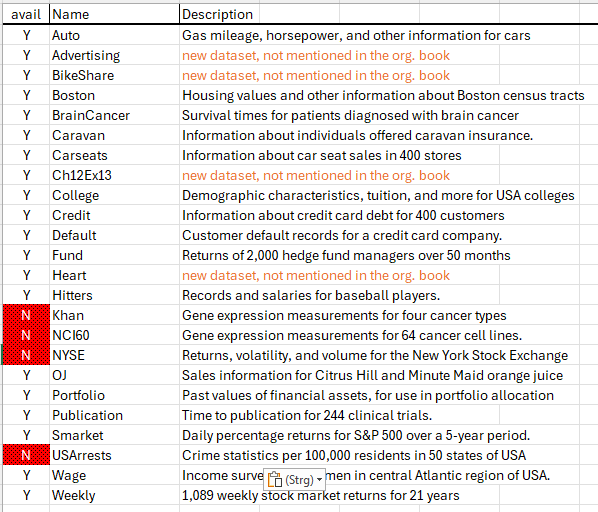

In [ ]:
# test dataset
test_df = load_data('USArrest')
print(type(test_df)); print(" ")
test_df.keys()

In [ ]:
from statsmodels.datasets import get_rdataset
USArrests = get_rdataset('USArrests').data

## all req statistfied

In [ ]:
# example load data
from ISLP import load_data

new_df = load_data("Wage")
new_df.head(3)

## Chapter 1: Intro & Datasets
---

### Wage Dataset - for 1.1 and Chapter 3



*   wage increases by approximately 10k in almost linear way between 2003-2009
*   Wage are greater for individuals with higher level of education
*   Clearly prediction of wage can be based on age, education & year
*   Chapter 3 will dive deeper into prediction wage based on their features with linear regression

*   Ideally, wage should be predicted that accounts for non-linear relationship between age & wage

In [ ]:
real_df = pd.read_csv("/content/Wage.csv")
new_df = deepcopy(real_df)
new_df.head(3)

In [ ]:
num_df = new_df.select_dtypes(include=np.number)
new_df['education'].value_counts()

In [ ]:
new_df.boxplot(column="wage", by="education", rot=45)
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
X = new_df["age"].values.reshape(-1,1)  # iloc[:, 1] is the column of X
Y = new_df["wage"].values.reshape(-1,1)  # iloc[:, 1] is the column of X
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
new_df.plot.scatter(x="year", y="wage", alpha=0.7)
plt.figure(figsize=(8,6))

In [ ]:
new_df.boxplot(column="wage", by="year", rot=45)
plt.figure(figsize=(8,6))
plt.show()

In [ ]:
new_df.boxplot(column="wage", by="race")

### 1.2 Stock Market Data

In [ ]:
stock_df = load_data("Smarket")
#df = pd.read_csv("/content/Smarket.csv")
#stock_df = deepcopy(df)
stock_df.head(3)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8,6))
c_pal = sns.color_palette("husl", 2)


# first subplots
sns.boxplot(x="Direction", y="Lag1", data=stock_df, ax=axes[0], palette=c_pal)
axes[0].set_xticklabels(axes[0].get_xticklabels())

#second subplots
sns.boxplot(x="Direction", y="Lag2", data=stock_df, ax=axes[1], palette=c_pal)
axes[1].set_title("Box plot of yesterday, two days and three days previous performance")

#third subplots
sns.boxplot(x="Direction", y="Lag3", data=stock_df, ax=axes[2], palette=c_pal)

plt.tight_layout()
plt.show()

*    The left-hand panel of Figure 1.2 displays two boxplots of the previous
day’s percentage changes in the stock index: one for the 648 days for which
the market increased on the subsequent day, and one for the 602 days for
which the market decreased.


*    The two plots look almost identical, suggesting
that there is **no simple strategy for using yesterday’s movement in the
S&P to predict today’s returns**.

*  Of course, this
lack of pattern is to be expected: in the presence of strong correlations between
successive days’ returns, one could adopt a simple trading strategy
to generate profits from the market.

*  Nevertheless, in Chapter 4, we explore
these data using several different statistical learning methods.

### Gene Dataset: missing

Dataset was not found??


---



*   Previous dataset illustrate data sets with both input and output variables. However, clustering problems involves situations in which we only observe input variables, with no corresponding output.

*  For example, in a marketing setting, we might have demographic
information for a number of current or potential customers

## Chapter 2: Auto Data
---

### Chapter 2.1 - What is statistical learning?

Suppose that we are statistical consultants hired by a client to
investigate **the association between advertising and sales of a particular**
product. The **Advertising data** set consists of the sales of that product
in 200 different markets, along with advertising budgets for the product in
each of those markets for three different media: TV, radio, and newspaper. In each plot we show the simple least squares
fit of sales to that variable, as described in Chapter 3. In other words, each blue
line represents a simple model that can be used to predict sales using TV, radio,
and newspaper, respectively.

##### code

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
dff = pd.read_csv("/content/Advertising.csv")
dff.drop(dff.columns[0], inplace=True, axis=1)
dff

In [ ]:
# variable
var = 0
ncol = dff.columns.shape[0]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8*ncol,6))

for col in dff.columns:
  X_tv = dff[col].values.reshape(-1,1)
  Y_tv = dff["sales"].values
  lin_reg = LinearRegression()
  lin_reg.fit(X_tv, Y_tv)
  Y_pred = lin_reg.predict(X_tv)

  axes[var].scatter(X_tv, Y_tv)
  axes[var].plot(X_tv, Y_pred, color="red")
  axes[var].set_ylabel("sales number")
  axes[var].set_xlabel(col)
  var += 1

  if var == ncol - 1:
    break

plt.tight_layout()
plt.show()

##### 2.1.1: Why estimate f?

In [ ]:
color = ["red", "green", "blue"]
col = dff.columns.shape[0] -1
var = 0

for columns in dff.columns:
  sns.scatterplot(x=dff[columns], y=dff['sales'], color=color[var], label=columns)
  var +=1
  if var == col:
    break

plt.legend()  # Placing the legend on the plot
plt.show()

In essence, **statistical learning refers to a set of approaches for estimating
f**. In this chapter we outline some of the key theoretical concepts that arise
in estimating f, as well as tools for evaluating the estimates obtained.



*   *Prediction*:

In many situations, a set of inputs X are readily available, but the output Y cannot be easily obtained. In this setting, since the error term averages to zero, we can predict Y using:
$Yhat  =  fhat(X)$

where:

$fhat$: estimate for $f$

$Yhat$: resulting prediction

In this setting, $fhat$ is often treated as a black box, in the sense
that one is not typically concerned with the exact form of $fhat$, provided that
it yields accurate predictions for Y .


Reading the auto.csv data

In [ ]:
DataFrame = pd.read_csv("/content/Auto.data", delim_whitespace=True)
DataFrame

In [ ]:
hpw = DataFrame["horsepower"]

In [ ]:
Auto = pd.read_csv("/content/Auto.data",
                   na_values=["?"],
                   delim_whitespace=True
                   )

Auto.info

In [ ]:
cat_cols = Auto.select_dtypes(exclude=[np.number]).columns.tolist()
num_df = Auto.drop(cat_cols, axis=1)
num_cols = num_df.columns

for col in num_cols:
    plt.hist(Auto[Auto["origin"]==1][col], color="blue", label="1", alpha=0.7, density=True)
    plt.hist(Auto[Auto["origin"]==2][col], color="red", label="2", alpha=0.7, density=True)
    plt.hist(Auto[Auto["origin"]==3][col], color = "green", label="3", alpha=0.7, density=True)

    plt.title(f"Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

### Kapitel 2.3 Introducton to Phyton - Numpy / Pandas


In [ ]:
from matplotlib.pyplot import subplots
rng = np.random.default_rng(34)

fig , ax = subplots(figsize=(6, 3))
x = rng.standard_normal(100)
y = rng.standard_normal(100)
ax.plot(x, y);
plt.xlabel("test")

### 2.4 Exercises

applied statistical knowledge

#### 2.4.8 College Dataset

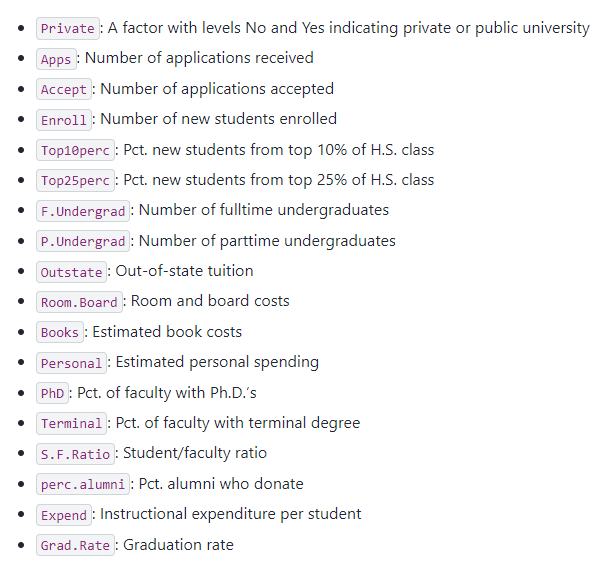

In [ ]:
###### (A)
data = load_data("College")
data

In [ ]:
###### (B)
College_data = pd.read_csv("/content/College.csv")
College_data.rename(columns={'Unnamed: 0':"College"}, inplace=True)
College_data.set_index("College")

In [ ]:
College_data.columns

In [ ]:
###### (C)
College_data.describe()

In [ ]:
###### (D)
cols = ["Top10perc", "Apps", "Enroll"]
scatter_df = College_data[cols]
scatter_df

In [ ]:
###### (D)
pd.plotting.scatter_matrix(scatter_df, alpha=0.2, figsize=(10,7))

In [ ]:
###### (E)
sns.boxplot(x="Private", y="Outstate", data=College_data)
plt.title("Boxplot of Out of state and private")
plt.show()

In [ ]:
###### only test
plt.figure(figsize=(5,3))
College_data.plot(kind="box", x="Private", y="Outstate", title="TEst")
plt.show()

In [ ]:
###### (F)
College_data['Elite'] = pd.cut(College_data['Top10perc'],
[0,50,100],
labels=['No', 'Yes'])
College_data

In [ ]:
College_data["Elite"].value_counts()

In [ ]:
sns.boxplot(x="Elite", y="Outstate", data=College_data)
plt.title("Boxplot of Out of state and private")
plt.show()

In [ ]:
#### (G)
College_data.columns

In [ ]:
## Reihe auswählen, In diesem Fall fokussiert sich die Betrachnung nach der
## durchschnittlichen Ausgaben einer normalen Studenten außerhalb der Studiengebühren.
sel_columns = ["Room.Board", "Books", "S.F.Ratio", "Expend", "Grad.Rate"]

for col_name in sel_columns:
  plt.figure(figsize=(8,6))
  College_data[col_name].plot(kind="hist", bins=20, title=f"Histogram of {col_name}")
  mean_value = College_data[col_name].mean()
  plt.axvline(mean_value, color="red", linewidth=1,
              label=f"Avg. of {col_name}:{mean_value:.2f}"
              )
  plt.xlabel(f"bins of {col_name}")
  plt.legend()
  plt.show()

In [ ]:
## jetzt machen wir das Vergleich von Elite und non-Elite College Studierenden mit denselben Features!
sel_columns = ["Room.Board", "Books", "S.F.Ratio", "Expend", "Grad.Rate"]

col_name = "Books"

plt.figure(figsize=(8,6))

# elite
plt.hist(College_data[College_data["Elite"]=="Yes"][col_name], color="green",
         label="Elite", alpha=0.5, density=True
)

# plot Avg.line elite
plt.axvline(mean_Elite, color="red", linewidth=1,
              label=f"Avg. book cost: ${mean_Elite:.2f}"
)

# non elite
plt.hist(College_data[College_data["Elite"]=="No"][col_name], color="blue",
         label="Non-Elite", alpha=0.5, density=True
)


mean_Elite = College_data[College_data["Elite"]=="Yes"][col_name].mean()
mean_Non_elite = College_data[College_data["Elite"]=="No"][col_name].mean()

# plot Avg.line non
plt.axvline(mean_Non_elite, color ="black", linewidth=1,
            label=f"Avg. book cost: ${mean_Non_elite:.2f}")

plt.xlabel(f"bins of {col_name}")
plt.legend()
plt.show()

In [ ]:
## automation for all features
sel_columns = ["Room.Board", "Books", "Expend"]

fig, axs = plt.subplots(nrows=3, ncols=1,
                        figsize=(8,15)
)

list_mean_elite = []
list_mean_N_elite = []

# flatten the axes into 1D array
axs = np.ravel(axs)

for ax, col in zip(axs, sel_columns):
    # Elite - histogram & Avg. -
    ax.hist(College_data[College_data["Elite"]=="Yes"][col], color="green",
            label="Elite", alpha=0.5, density=True
    )
    mean_Elite = College_data[College_data["Elite"]=="Yes"][col].mean()
    ax.axvline(mean_Elite, color="red", linewidth=1,
                   label=f"Avg. {col} cost: ${mean_Elite:.2f}"
    )

    # Non-Elite - histogram & Avg. -
    ax.hist(College_data[College_data["Elite"]=="No"][col], color="blue",
            label="Non-Elite", alpha=0.5, density=True)
    mean_Non_elite = College_data[College_data["Elite"]=="No"][col].mean()
    ax.axvline(mean_Non_elite, color ="black", linewidth=1,
           label=f"Avg. {col} cost: ${mean_Non_elite:.2f}")

    # set up plot label and legend
    ax.set_xlabel(f"Bins of {col}")
    ax.set_ylabel("Density")
    ax.set_title(f"Difference in terms of {col}")
    ax.legend()

    # add number of elite and non.elite mean
    list_mean_elite.append(mean_Elite)
    list_mean_N_elite.append(mean_Non_elite)

plt.tight_layout()
plt.show()

In [ ]:
# difference in terms of cost:

diff = 0

for mean_e, mean_n in zip(list_mean_elite, list_mean_N_elite):
  delta = mean_e - mean_n
  diff += delta

print(f"In terms of these 3 metrics, Students in elite universities pays ${round(diff,2)} more")

Die Plots zeigen uns wie sich die durchschnittliche Ausgaben der Studenten in einer Elite und Non-Elite Universität unterscheiden. Zudem werden kostenbezogene Metriken wie **Wohnkosten**, **Vorlesungsbücher** und **Lebenhaltungskosten** in der Analyse gezogen. Es zeigt sich dass, im Durchschnitt Studierenden an einer eliten Hochschulen  **fast. $11.000 mehr für ihre Ausgaben während des Studium gezahlt haben** im Vergleich zu Studierenden im "normalen" Hochschulen. Die Mehrkosten könnten daran liegen, dass die eliten Unis sehr viel an Ihre Forschungseinrichtung und verschiedene Angeboten im Campus investieren. Es ist auch von unserer Interesse zu finden, ob die größere finanzielle Belastung zum Erfolg des Studiums beitragen könnte.

In [ ]:
col ="Grad.Rate"

plt.figure(figsize=(8,6))

# Elite - histogram / axvline -
plt.hist(College_data[College_data["Elite"]=="Yes"][col], label="Elite", alpha=0.7, density=True, color="green")
meanE_grad = College_data[College_data["Elite"]=="Yes"][col].mean()
plt.axvline(meanE_grad, linewidth=1, label=f"Avg. Graduation Rate of Elite: {meanE_grad:.1f}%", color="red")

# Non-Elite - histogram / axvline -
plt.hist(College_data[College_data["Elite"]=="No"][col], label="Non-Elite", alpha=0.7, density=True, color="blue")
meanE_grad = College_data[College_data["Elite"]=="No"][col].mean()
plt.axvline(meanE_grad, linewidth=1, label=f"Avg. Graduation Rate of Non-Elite: {meanE_grad:.1f}%", color="black")

plt.ylabel("probability")
plt.xlabel("Graduation Rate")
plt.title("Graduation Rate Comparison of Elite and Non-Elite School")
plt.legend()
plt.show()

Die Grafik zeigt deutlich, dass Studierende an Eliteuniversitäten ihr Studium eher abschließen.

#### 2.4.9 Auto Dataset

##### Discrepancies

In [ ]:
###### (A)
auto_df_p = load_data("Auto")
auto_df_p

In [ ]:
auto_df_w = pd.read_csv("/content/Auto.csv")
auto_df_w.head(5)

In [ ]:
auto_df_w["name"].value_counts()

In [ ]:
auto_df_p["name"].value_counts()

In [ ]:
# Indices present in df1 but not in df2
missing_index_df1 = auto_df_p.index[~auto_df_p.index.isin(auto_df_w.index)].tolist()
print("Missing indices in df1 :", missing_index_df1)

# Indices present in df2 but not in df1
missing_index_df2 = auto_df_w.index[~auto_df_w.index.isin(auto_df_p.index)].tolist()
print("Missing indices in df2 :", missing_index_df2)

##### Exercise begin

In [ ]:
auto_df_w = pd.read_csv("/content/Auto.csv")
auto_df_w.head(5)

In [ ]:
## use auto_df_w
auto_df_w.isna().sum()

In [ ]:
##### (A) Which one is the predictors of quantiative and qualitative?

## quantitative columns
quant_columns = auto_df_w.select_dtypes(include=np.number).columns.to_list()
quant_columns

In [ ]:
# qualitative columns
qual_columns = auto_df_w.select_dtypes(exclude=np.number).columns.to_list()
qual_columns

In [ ]:
##### (B) What is the range of each quantitative predictor?
##### (C) What is the mean and standard deviation of each quantitative .max() predictor?

quant_df = auto_df_w.select_dtypes(include=np.number)
quant_df.describe().round(2)

In [ ]:
##### (C) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation

idx_drop = [i for i in range(10,86)]
c_quant_df = quant_df.drop(idx_drop)

In [ ]:
c_quant_df.describe().round(2)

In [ ]:
sns.pairplot(data=auto_df_w, hue="origin", diag_kind="hist")

In [ ]:
x = ["displacement", "weight", "acceleration"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, col in enumerate(x):
  sns.scatterplot(data=auto_df_w, x=col, y="mpg", hue="origin", ax=ax[i])
  ax[i].set_title(f"scatter plot of {col} and weight")

plt.tight_layout()
plt.show()

In [ ]:
##### (f) MPG prediction using other variables. search for correlation
num_autoDF = auto_df_w.select_dtypes(include=np.number)
correlation = num_autoDF.corr()
correlation["mpg"].sort_values(ascending=False)

Fast alle Features haben einigermaßen bedeutsame Beziehung auf den Benzinverbrauch. Aus 6 Features, 3 Features haben negative während 3 andere haben positive Beziehung zum Zielparameter MPG

In [ ]:
X_2 = auto_df_w.columns.to_list()
X_2.remove("mpg")
X_2.remove("name")
X_2.remove("cylinders")
X_2.remove("year")
X_2.remove("origin")

In [ ]:
fig, ax = plt.subplots(nrows=len(X_2), ncols=1, figsize=(8,18))

for i, col in enumerate(X_2):
  sns.scatterplot(data=auto_df_w, x=col, y="mpg", hue="origin", ax=ax[i])
  ax[i].set_title(f"Plot of {col} and Gas-milage")
  for label in ax[i].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()

#### which one to boxplots = cylinder, year, origin

In [ ]:
box_cols = ["cylinders","year","origin"]

In [ ]:
fig, ax = plt.subplots(nrows=len(box_cols), ncols=1, figsize=(8,21))

for i, col in enumerate(box_cols):
  sns.boxplot(data=auto_df_w, x=col, y="mpg", hue=None, ax=ax[i])
  ax[i].set_title(f"Plot of {col} and Gas-milage")
  for label in ax[i].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()

#### which one to boxplots = cylinder, year, origin

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

def split_input_output(data, output_cols):
  input = data.drop(columns=output_cols)
  output = data[output_cols]

  print(f"Input data has: {input.shape} shape")
  print(f"Output data has: {output.shape} shape")
  return input, output

In [ ]:
# splitting into input and output
X, y = split_input_output(auto_df_w, "mpg")

In [ ]:
## split into train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42)

#### Testing using ISLP libraries

In [ ]:
list_cols = auto_df_w.columns.to_list()
list_cols

In [ ]:
X_a = auto_df_w["horsepower"]
y_a = auto_df_w["mpg"]

In [ ]:
print(type(X_a))

In [ ]:
def percent_question(series):
    """
    Calculate the percentage of missing values in each column of a series.
    """
    # catch missing value type na, None and ""
    missing_values = series.eq("?").sum()

    if missing_values > 0:
      clean_series = deepcopy(series)
      idx_miss = series[series == '?'].index.to_list()
      clean_series.drop(idx_miss, inplace=True)

    else:
      clean_series = deepcopy(series)

    print(missing_values)
    print(f"before function series has: {series.shape}")
    print(f"after function series has: {clean_series.shape}")

    return missing_values, clean_series



In [ ]:
MissVal_X , X_clean = percent_question(X_a)
print("")
MissVal_y, y_clean = percent_question(y_a)

In [ ]:
auto = pd.read_csv('/content/Auto.csv', index_col='name', na_values=['?'])
auto.dropna(inplace=True)
auto.head()

In [ ]:
x_a = sm.add_constant(auto['horsepower'])
y_a = auto['mpg']

linear_model = sm.OLS(y_a, x_a).fit()
linear_model.summary()

#### Boston Dataset

In [ ]:
boston_df = load_data("Boston")
boston_df

In [ ]:
boston_df_w = pd.read_csv("/content/Boston.csv")
boston_df_w

## Chapter 3: Linear Regression
---

#### Applied Question. / Lab Linear Regression

3.7.8 This question involves the use of simple linear regression on the Auto
data set.

(a) Use the sm.OLS() function to perform a simple linear regression
with mpg as the response and horsepower as the predictor. Use
the summarize() function to print the results. Comment on the
output. For example:

1.   Is there a relationship between the predictor and the response?
2.   How strong is the relationship between the predictor and
the response?
3.   Is the relationship between the predictor and the response
positive or negative?
4.  What is the predicted mpg associated with a horsepower of
98? What are the associated 95 % confidence and prediction
intervals?

(b) Plot the response and the predictor in a new set of axes ax. Use
the ax.axline() method or the abline() function defined in the
lab to display the least squares regression line.

(c) Produce some of diagnostic plots of the least squares regression
fit as described in the lab. Comment on any problems you see
with the fit.

##### **processing continuation from 2.8 Auto Dataset**

In [ ]:
auto_df = pd.read_csv("/content/Auto.csv")
auto_df.head(5)

In [ ]:
## use auto_df_w
auto_df.isna().sum()

In [ ]:
##### (A) Which one is the predictors of quantiative and qualitative?

## quantitative columns
quant_columns = auto_df.select_dtypes(include=np.number).columns.to_list()
quant_columns

In [ ]:
# qualitative columns
qual_columns = auto_df.select_dtypes(exclude=np.number).columns.to_list()
qual_columns

In [ ]:
##### (B) What is the range of each quantitative predictor?
##### (C) What is the mean and standard deviation of each quantitative .max() predictor?

quant_df = auto_df.select_dtypes(include=np.number)
quant_df.describe().round(2)

In [ ]:
##### (C) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation

idx_drop = [i for i in range(10,86)]
c_quant_df = quant_df.drop(idx_drop)

In [ ]:
c_quant_df.describe().round(2)

In [ ]:
sns.pairplot(data=auto_df, hue="origin", diag_kind="hist")

In [ ]:
x = ["displacement", "weight", "acceleration"]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,6))

for i, col in enumerate(x):
  sns.scatterplot(data=auto_df, x=col, y="mpg", hue="origin", ax=ax[i])
  ax[i].set_title(f"scatter plot of {col} and weight")

plt.tight_layout()
plt.show()

In [ ]:
##### (f) MPG prediction using other variables. search for correlation
num_autoDF = auto_df.select_dtypes(include=np.number)
correlation = num_autoDF.corr()
correlation["mpg"].sort_values(ascending=False)

Fast alle Features haben einigermaßen bedeutsame Beziehung auf den Benzinverbrauch. Aus 6 Features, 3 Features haben negative während 3 andere haben positive Beziehung zum Zielparameter MPG

In [ ]:
X_2 = auto_df.columns.to_list()
X_2.remove("mpg")
X_2.remove("name")
X_2.remove("cylinders")
X_2.remove("year")
X_2.remove("origin")

In [ ]:
fig, ax = plt.subplots(nrows=len(X_2), ncols=1, figsize=(8,18))

for i, col in enumerate(X_2):
  sns.scatterplot(data=auto_df, x=col, y="mpg", hue="origin", ax=ax[i])
  ax[i].set_title(f"Plot of {col} and Gas-milage")
  for label in ax[i].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()

#### which one to boxplots = cylinder, year, origin

In [ ]:
box_cols = ["cylinders","year","origin"]

In [ ]:
fig, ax = plt.subplots(nrows=len(box_cols), ncols=1, figsize=(8,21))

for i, col in enumerate(box_cols):
  sns.boxplot(data=auto_df, x=col, y="mpg", hue=None, ax=ax[i])
  ax[i].set_title(f"Plot of {col} and Gas-milage")
  for label in ax[i].get_xticklabels():
    label.set_rotation(45)

plt.tight_layout()
plt.show()

#### which one to boxplots = cylinder, year, origin

##### Exercise 3.7.8 Begin

In [ ]:
list_cols = auto_df.columns.to_list()
list_cols

In [ ]:
X_a = auto_df["horsepower"]
y_a = auto_df["mpg"]

In [ ]:
auto_df.info()

horsepower has an object Dtype, which means their values are not purely numerical. We have to investigate

In [ ]:
X_a.sort_values().tail(20)

some observation have some missing values which are noted with "?" lets clean this data first before processing

In [ ]:
def percent_question(series):
    """
    Calculate the percentage of missing values in each column of a series.
    """
    # catch missing value type na, None and ""
    missing_values = series.eq("?").sum()

    if missing_values > 0:
      clean_series = deepcopy(series)
      idx_miss = series[series == '?'].index.to_list()
      clean_series.drop(idx_miss, inplace=True)
      clean_series = clean_series.astype(float, errors='ignore')

    else:
      clean_series = series

    print(f"{missing_values} missing values")
    print(f"before function series has: {series.shape}")
    print(f"after function series has: {clean_series.shape}")

    return missing_values, clean_series

def match_series(x_series, y_series):
    # Check if lengths are not equal
    if len(x_series) != len(y_series):
         # Shorter series is y_series, so trim x_series
        if len(x_series) > len(y_series):
            x_series = x_series[x_series.index.isin(y_series.index)]
        else:
            # Shorter series is x_series, so trim y_series
            y_series = y_series[y_series.index.isin(x_series.index)]
    print(x_series.shape)
    print(y_series.shape)
    return x_series, y_series


In [ ]:
MissVal_X , X_clean = percent_question(X_a)
print("")
MissVal_y, y_clean = percent_question(y_a)

In [ ]:
X_clean, y_clean = match_series(X_clean, y_clean)

In [ ]:
df_combine38 = pd.concat([X_clean, y_clean], axis=1)
df_combine38.reset_index(inplace=True, drop=True)
df_combine38.head(5)

In [ ]:
sns.scatterplot(data=df_combine38, x="horsepower", y="mpg")

In [ ]:
linear_model = sm.OLS(y_clean, X_clean).fit()
print(linear_model.summary())

Based on the model summary, there are several points we can conclude:

1.   Is there a relationship between the predictor and the response?

**Strong Relationship Between Variables**: The R-squared value of 0.649 suggests that about 64.9% of the variability in the dependent variable is explained by the independent variable, horsepower. This is a relatively strong relationship, indicating that horsepower is a significant predictor of mpg. Additionally, The very small p-value associated with the F-statistic (5.67e-91) confirms that the model as a whole is statistically significant.


2.    How strong is the relationship between the predictor and the response?

-- This is the correct answer -- the coefficient above shows a positive correlation which is false. The following answer is correct:

For a unit increase in horsepower, **our model predicts mpg will decrease by -0.1578**. So for example, increasing horsepower by 10 is expected to decrease efficiency by -1.578 mpg.

In [ ]:
 ###
"""
4.  What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?
"""
## prediction using sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

x = X_clean.reshape(-1,1)
y = y_clean.ravel()

#print(f"{x.shape} : x shape")
#print(f"{y.shape} : y shape")

lr.fit(x, y)

In [ ]:
## prediction
hp_value = np.array([[98]])
mpg_pred = lr.predict(hp_value)
print(f"with 98 horsepower, our model predicted a {np.round(mpg_pred, decimals=2)} mpg value")

### (b) Plot the response and the predictor in a new set of axes ax. Use the **ax.axline()** method or the **abline()** function defined in the lab to display the least squares regression line.